<a href="https://colab.research.google.com/github/YashJindal07/MNIST_project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#converts image into a tensor of 4-D(no of images, height, width, colour channels)
transform = transforms.ToTensor()


In [ ]:
# train data

train_data = datasets.MNIST(root='/cnn_data',download=True, train=True,transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4169918.67it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134407.05it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1268921.31it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3001028.48it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [ ]:
# test data

test_data = datasets.MNIST(root='/cnn_data',download=True, train=False,transform = transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
# create a small batch for images say 10
train_loader = DataLoader(train_data, batch_size=10,shuffle=True)
test_loader = DataLoader(test_data, batch_size=10,shuffle=False)

In [ ]:
# define our CNN model
# Describe the convolutional layer and what it's doing
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)



In [ ]:
# grab 1 MNIST/record image

for i, (X_Train, y_train) in enumerate(train_data):
  break

In [ ]:
# model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1= nn.Conv2d(1,6,3,1)
    self.conv2= nn.Conv2d(6,16,3,1)
    # fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel and stride
    # second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel and stride

    # review to flatten it out
    X = X.view(-1,16*5*5) # negative so that we can vary the batch size

    # fully connected layers
    X= F.relu(self.fc1(X))
    X= F.relu(self.fc2(X))
    X= self.fc3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
# create an instance of our model
torch.manual_seed =41
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time
start_time = time.time()

# create variables to track things
epochs=5
train_losses=[ ]
test_losses=[ ]
train_correct=[ ]
test_correct=[ ]

# for loop in epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0



  # train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the traiing set. not flattened
    loss = criterion(y_pred, y_train) # how off are we? compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up number of corrrect predictions
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    trn_corr += batch_corr # keep track as we go alomg in training

    # update your parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print out some results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # test
  with torch.no_grad(): # no gradient so we don't update our weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
       y_val = model(X_test)
       predicted = torch.max(y_val.data, 1)[1] # adding up correct predictions
       tst_corr += (predicted == y_test).sum()

  loss  = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Training Took:  {total/60} minutes!')








Epoch: 0 Batch: 600  Loss: 0.25816610455513
Epoch: 0 Batch: 1200  Loss: 0.4001937508583069
Epoch: 0 Batch: 1800  Loss: 0.1246405839920044
Epoch: 0 Batch: 2400  Loss: 0.34820958971977234
Epoch: 0 Batch: 3000  Loss: 0.04991669952869415
Epoch: 0 Batch: 3600  Loss: 0.10683010518550873
Epoch: 0 Batch: 4200  Loss: 0.33169159293174744
Epoch: 0 Batch: 4800  Loss: 0.0005959327099844813
Epoch: 0 Batch: 5400  Loss: 0.024639204144477844
Epoch: 0 Batch: 6000  Loss: 0.631161093711853
Epoch: 1 Batch: 600  Loss: 0.03133280575275421
Epoch: 1 Batch: 1200  Loss: 0.0027504158206284046
Epoch: 1 Batch: 1800  Loss: 0.20234569907188416
Epoch: 1 Batch: 2400  Loss: 0.003772509517148137
Epoch: 1 Batch: 3000  Loss: 0.09004924446344376
Epoch: 1 Batch: 3600  Loss: 0.030506005510687828
Epoch: 1 Batch: 4200  Loss: 0.006450359709560871
Epoch: 1 Batch: 4800  Loss: 0.002538511995226145
Epoch: 1 Batch: 5400  Loss: 0.0012410535709932446
Epoch: 1 Batch: 6000  Loss: 0.008221600204706192
Epoch: 2 Batch: 600  Loss: 0.00138274

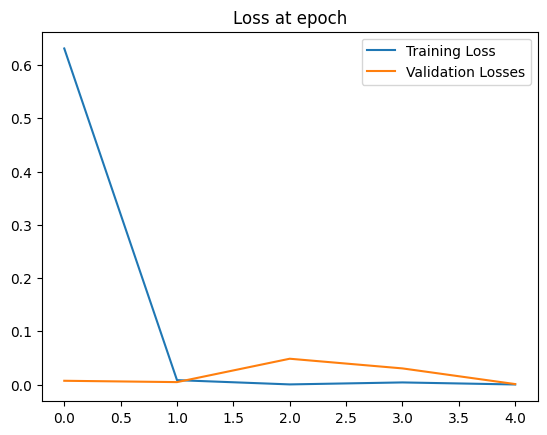

In [ ]:
# graph the loss at epoch

train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Validation Losses')
plt.title('Loss at epoch')
plt.legend()

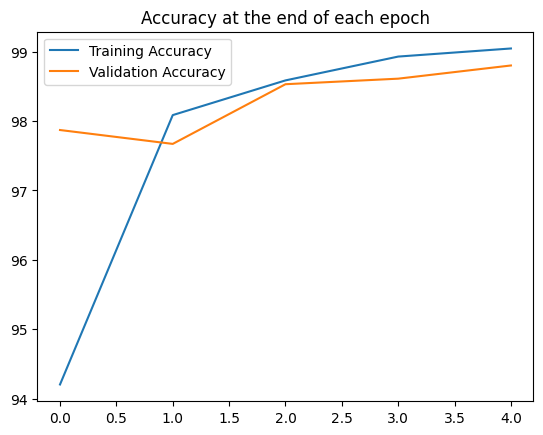

In [38]:
# graph the accuracy at ehe end of each epoch

plt.plot([t/600 for t in train_correct], label = 'Training Accuracy')
plt.plot([t/100 for t in test_correct], label = 'Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle = False)
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
# did for correct
correct.item()

9880

In [40]:
# grab an image
test_data[4142][1]

7

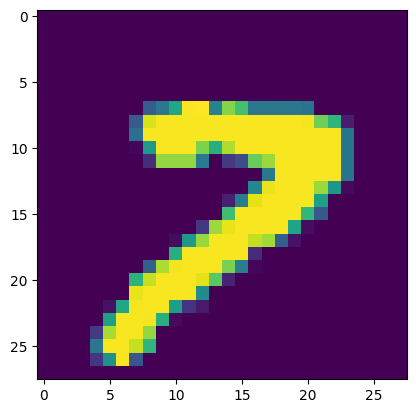

In [42]:
plt.imshow(test_data[4142][0].reshape(28,28)
)

In [43]:
# pass the image thru our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4142][0].view(1,1,28,28))

In [44]:
new_prediction.argmax()

tensor(7)

In [45]:
torch.save(model.state_dict(), 'MNIST_project.pt')

new_model = ConvolutionalNetwork()
new_model.load_state_dict(torch.load('MNIST_project.pt'))

<All keys matched successfully>

In [46]:
new_model.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)